# 线性回归示例

这个notebook展示了如何使用scikit-learn实现简单的线性回归。

175平方米房屋的预测价格: 350.00万元


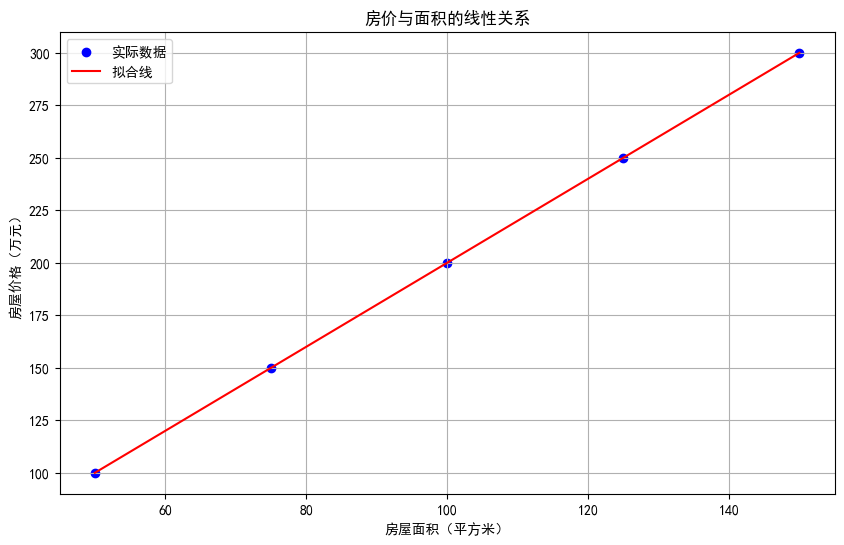

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 准备示例数据：房屋面积(平方米)和价格(万元)
X = np.array([[50], [75], [100], [125], [150]])  # 房屋面积
y = np.array([100, 150, 200, 250, 300])          # 对应价格

# 创建并训练模型
model = LinearRegression()
model.fit(X, y)

# 预测新房屋的价格
new_area = np.array([[175]])  # 预测175平方米房屋的价格
predicted_price = model.predict(new_area)
print(f"175平方米房屋的预测价格: {predicted_price[0]:.2f}万元")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='实际数据')
plt.plot(X, model.predict(X), color='red', label='拟合线')
plt.xlabel('房屋面积（平方米）')
plt.ylabel('房屋价格（万元）')
plt.title('房价与面积的线性关系')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# 准备非线性数据
X = np.array([[50], [75], [100], [125], [150]])
y = np.array([100, 200, 400, 700, 1000])  # 价格呈现加速增长

# 创建多项式回归模型
degree = 2  # 使用二次多项式
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)

# 预测新值
new_area = np.array([[175]])
pred_price = polyreg.predict(new_area)
print(f"175平方米房屋的预测价格: {pred_price[0]:.2f}万元")

175平方米房屋的预测价格: 1420.00万元


In [4]:
from sklearn.linear_model import Ridge

# 创建Ridge回归模型
ridge = Ridge(alpha=1.0)  # alpha控制正则化强度
ridge.fit(X, y)

# 预测房价
predictions = ridge.predict(new_area)
print(f"使用Ridge回归的预测价格: {predictions[0]:.2f}万元")

使用Ridge回归的预测价格: 1169.89万元


In [8]:
from sklearn.linear_model import Lasso

# 创建Lasso回归模型
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

# 进行预测
predictions = lasso.predict(X_test)
print(f"预测值: {predictions[0]}")

预测值: 27.5


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 交叉验证评估
scores = cross_val_score(LinearRegression(), X_scaled, y, cv=5, scoring='r2')
print(f"交叉验证R²分数: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

交叉验证R²分数: nan (+/- nan)


/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: Undefin

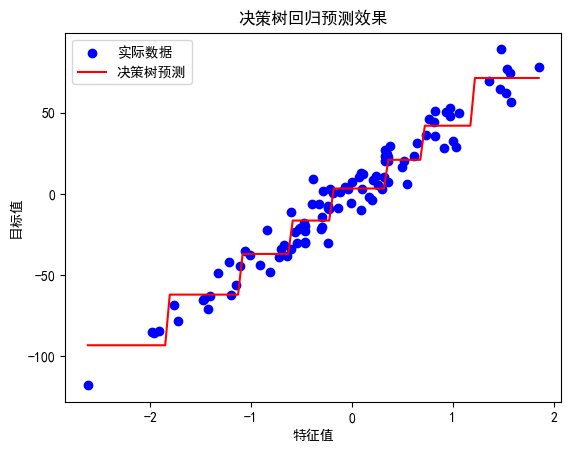

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 生成示例数据
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 创建并训练决策树模型
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# 预测并可视化
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = regressor.predict(X_test)

# 结果展示
plt.scatter(X, y, color='blue', label='实际数据')
plt.plot(X_test, y_pred, color='red', label='决策树预测')
plt.xlabel('特征值')
plt.ylabel('目标值')
plt.title('决策树回归预测效果')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 创建随机森林模型
rf_model = RandomForestRegressor(
    n_estimators=100,    # 树的数量
    max_depth=None,      # 树的最大深度
    min_samples_split=2, # 分裂所需的最小样本数
    min_samples_leaf=1,  # 叶节点最小样本数
    random_state=42
)

# 训练模型
rf_model.fit(X_train, y_train)

# 分析特征重要性
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("特征重要性排序：")
print(feature_importance)

NameError: name 'X_train' is not defined

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

# 创建GBM模型
gbm = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

# 训练模型
gbm.fit(X_train, y_train)

# 分析学习过程
train_sizes, train_scores, test_scores = learning_curve(
    gbm, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# 可视化学习曲线
plt.plot(train_sizes, train_scores.mean(axis=1), label='训练集得分')
plt.plot(train_sizes, test_scores.mean(axis=1), label='验证集得分')
plt.xlabel('训练样本数')
plt.ylabel('模型得分')
plt.title('学习曲线分析')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

# 创建SVR模型
svr = SVR(
    kernel='rbf',     # 使用RBF核函数
    C=100,           # 正则化参数
    epsilon=0.1,     # 误差容忍度
    gamma='scale'    # 核函数参数
)

# 训练模型
svr.fit(X_scaled, y_scaled)

# 预测并还原结果
y_pred = svr.predict(scaler.transform(X_test))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

NameError: name 'X_train' is not defined